In [1]:
#Extracting features from data
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

  Preparing metadata (setup.py) ... done


Part 1: Features of text

In [2]:
#Feature Extraction
topic1 = "Giraffe"
topic2 = "Elephant"

wikipedia.set_lang("en")
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [22]:
eng1 #Giraffe (English)

'the giraffe is a large african hoofed mammal belonging to the genus giraffa it is the tallest living terrestrial animal and the largest ruminant on earth traditionally giraffes have been thought of as one species giraffa camelopardalis with nine subspecies most recently researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear dna and individual species can be distinguished by their fur coat patterns seven other extinct species of giraffa are known from the fossil record\nthe giraffes distinguishing characteristics are its extremely long neck and legs hornlike ossicones and spotted coat patterns it is classified under the family giraffidae along with its closest extant relative the okapi its scattered range extends from chad in the north to south africa in the south and from niger in the west to somalia in the east giraffes usually inhabit savannahs and woodlands their food source is leaves fruits and flowers of woody plants p

In [6]:
fr2[:100] #Elephants (French)

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent au'

In [7]:
# Only sticking with 26 letters in both English and French (since French has accents as well)
def cleanup(text):
    text = text.lower()
    text = re.sub(
        r"[^a-z\s]", "", text
    )
    return text

In [8]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [9]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [10]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

In [12]:
#N grams
def tuple2string(tup):
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st

def key2string(keys):
    return [tuple2string(i) for i in keys]

def get_ngram_freq(ngram):
    keys = key2string(ngram.keys())
    values = list(ngram.values())
    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

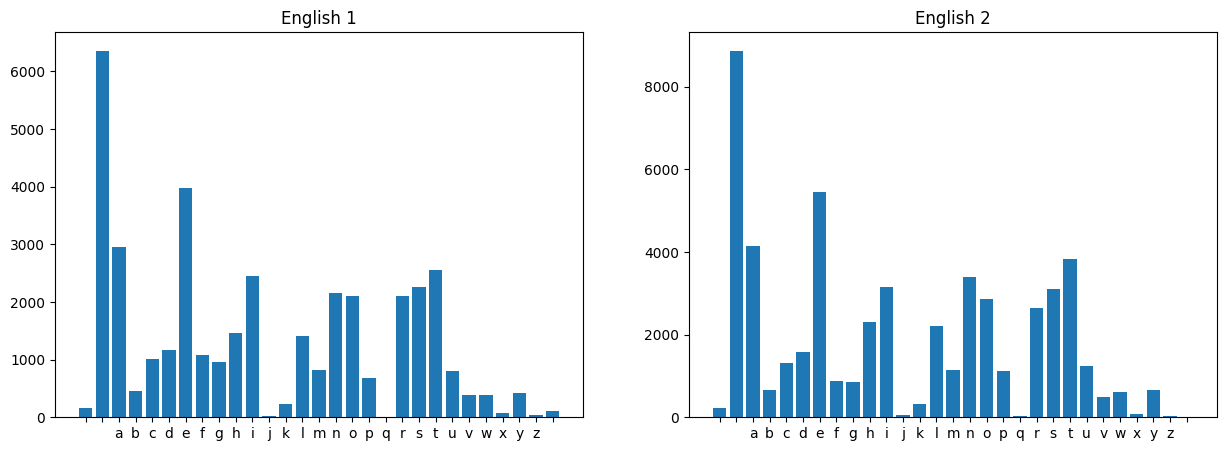

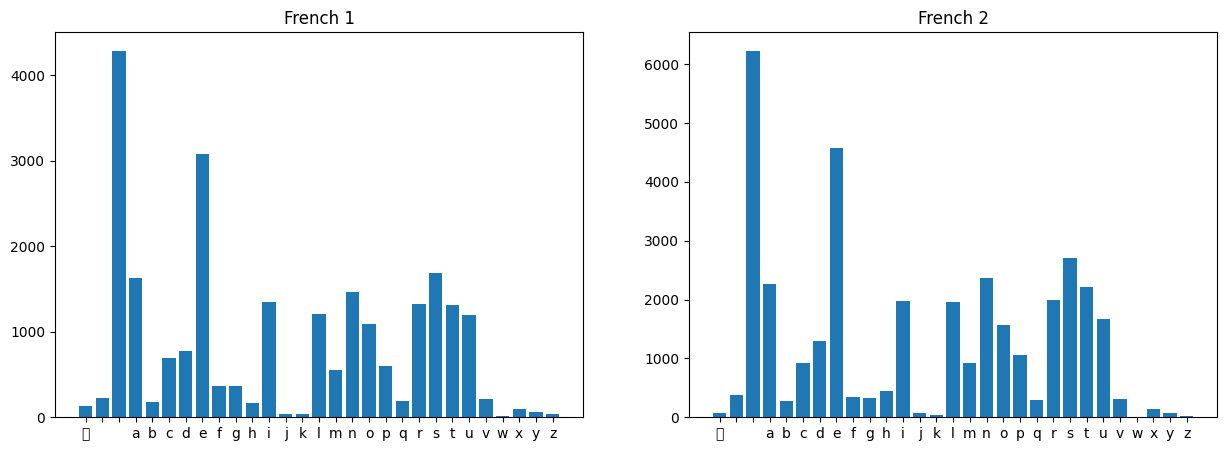

In [15]:
#Comparing both English and French pages using Histograms---> UNIGRAM
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_eng1 = Counter(ngrams(eng1, 1))
keys, values = get_ngram_freq(unigram_eng1)
axs[0].bar(keys, values)
axs[0].set_title("English 1")

unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_fr1 = Counter(ngrams(fr1, 1))
keys, values = get_ngram_freq(unigram_fr1)
axs[0].bar(keys, values)
axs[0].set_title("French 1")

unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")
plt.show()

***Task: Spot the Difference***

Here, if we were to compare English-1 and French-1 pages corresponding to the content about Giraffe, we can notice similarity among the two unigrams. For example, a is slighly bigger in English-1 and slighly smaller in French-1 whereas, q is nearly zero in the first and slighly bigger in the second. The difference between the values of the two unigrams is adequate enough, implying their similarity index.

Same is applicable in English-2 and French-2 pages corresponding to the content about Elephant.

**Result: Therefore, Unigram is not a good feature as it is not able to differentiate between the two pages.**

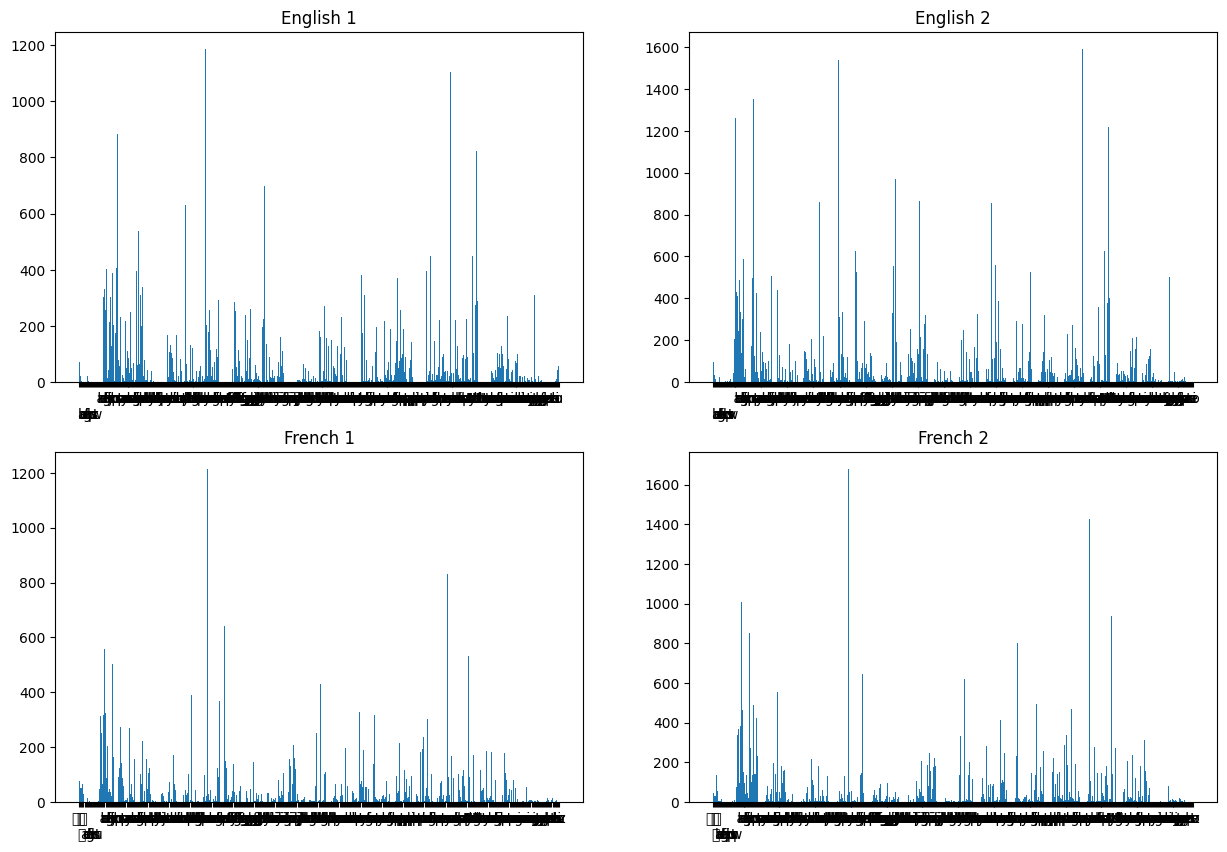

In [16]:
#Comparing both English and French pages using Histograms---> BIGRAM
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_eng1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 2))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

As in the case of bigrams, if we were to compare English-1 and French-1 pages corresponding to the content about Giraffe, we can notice that the peaks of English-1 are higher than in the case of French-1, indicating some dissimilarity.

Same is applicable in English-2 and French-2 pages corresponding to the content about Elephant.

**Result: Therefore, Bigram is a good feature as it is able to differentiate between the two pages. But, I think a higher n-gram could increase the chances for distinguishing two documents easily.**

In [17]:
#Visualizing in 2-D graph
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

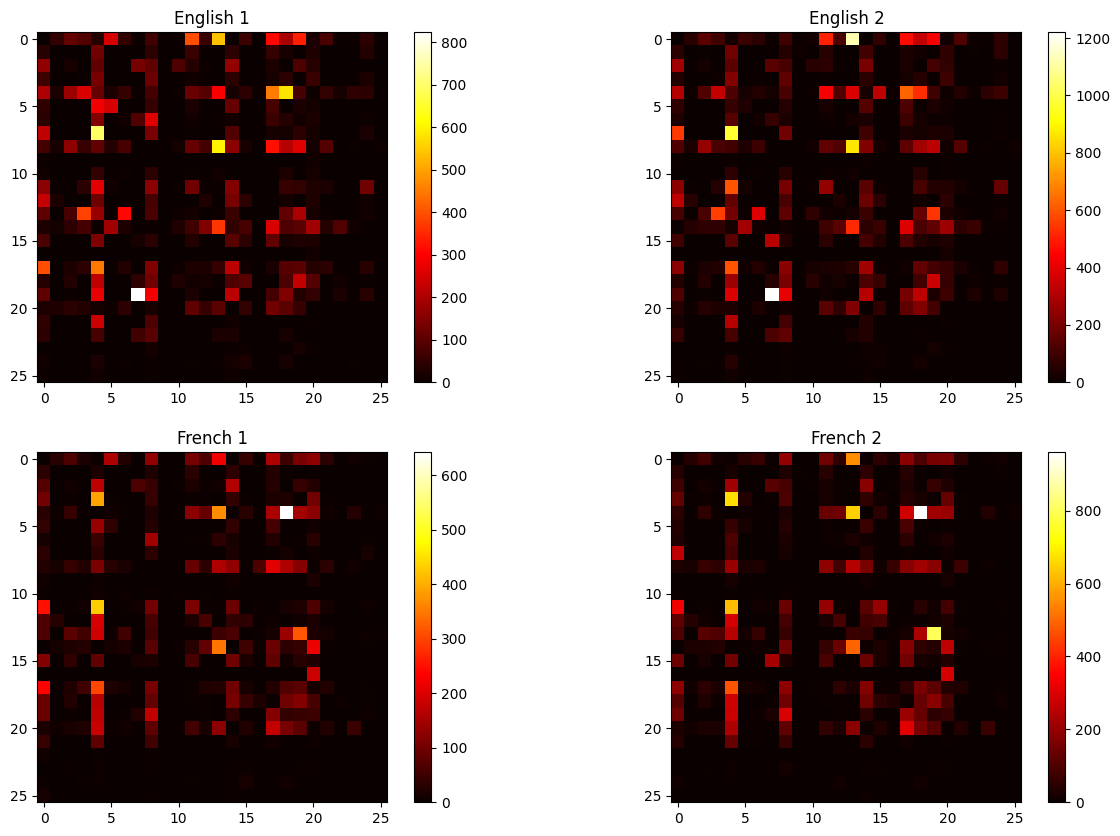

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="hot"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="hot"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="hot"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

In [20]:
# Top 10 ngrams for each text
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))

def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [21]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h') : 823.0
('h', 'e') : 697.0
('i', 'n') : 601.0
('e', 's') : 579.0
('a', 'n') : 539.0
('e', 'r') : 451.0
('r', 'e') : 449.0
('r', 'a') : 396.0
('a', 'l') : 396.0
('n', 'd') : 380.0

English 2:
('t', 'h') : 1220.0
('a', 'n') : 1122.0
('h', 'e') : 970.0
('i', 'n') : 867.0
('e', 'r') : 628.0
('r', 'e') : 599.0
('l', 'e') : 597.0
('n', 'd') : 561.0
('h', 'a') : 552.0
('n', 't') : 540.0

French 1:
('e', 's') : 642.0
('l', 'e') : 431.0
('d', 'e') : 392.0
('e', 'n') : 370.0
('o', 'n') : 348.0
('n', 't') : 318.0
('r', 'e') : 301.0
('l', 'a') : 250.0
('r', 'a') : 237.0
('a', 'n') : 223.0

French 2:
('e', 's') : 960.0
('n', 't') : 801.0
('d', 'e') : 671.0
('e', 'n') : 646.0
('l', 'e') : 620.0
('a', 'n') : 554.0
('o', 'n') : 494.0
('r', 'e') : 469.0
('l', 'a') : 333.0
('u', 'r') : 311.0


**Explore: Trying it with different languages.**

Suppose we take three regional languages in India- Hindi, Telugu and Punjabi.

In [ ]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

**Explore: Taking topics that are not related to each other and retrieving this information from pages other than Wikipedia.**

Suppose, we take our topic-1 as '**Hibiscus'** and topic-2 as '**Volcanoes'**.

Content about 'Hibiscus' from https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/hibiscus


Content about 'Volcanoes' from https://www.nationalgeographic.com/environment/article/volcanoes




**Explore: Visualize trigrams and higher N-grams.**

**Exercise: Try to extract trigrams and visualize the top 10 trigrams for each text**

